In [43]:
# https://www.superdatascience.com/opencv-face-detection/

In [3]:
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
import cv2
print('OpenCV version:', cv2.__version__)

OpenCV version: 3.4.3


In [1]:
import warnings
import sys
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda,floatX=float32"
import theano
import keras

print('Keras version:', keras.__version__)

Using cuDNN version 7005 on context None
Mapped name None to device cuda: Quadro K2100M (0000:01:00.0)
Using Theano backend.


Keras version: 2.2.2


In [5]:
def url2image(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

In [6]:
img_url = 'https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png'
bgr_image = url2image(img_url)

In [8]:
bgr_image.shape

(220, 220, 3)

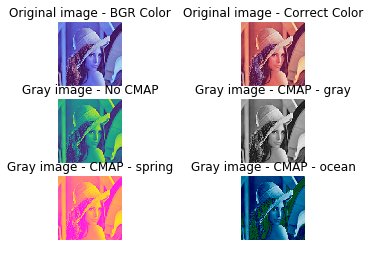

In [11]:
plt.subplot(3, 2, 1)
plt.axis('off')
plt.title('Original image - BGR Color')
plt.imshow(bgr_image)

plt.subplot(3, 2, 2)
plt.axis('off')
plt.title('Original image - Correct Color')
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))

gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
plt.subplot(3, 2, 3)
plt.axis('off')
plt.title('Gray image - No CMAP')
plt.imshow(gray_image)

plt.subplot(3, 2, 4)
plt.axis('off')
plt.title('Gray image - CMAP - gray')
plt.imshow(gray_image, cmap=plt.get_cmap('gray'))

plt.subplot(3, 2, 5)
plt.axis('off')
plt.title('Gray image - CMAP - spring')
plt.imshow(gray_image, cmap=plt.get_cmap('spring'))

plt.subplot(3, 2, 6)
plt.axis('off')
plt.title('Gray image - CMAP - ocean')
plt.imshow(gray_image, cmap=plt.get_cmap('ocean'))

# 4.2 Face Detection without Deep

In [4]:
def url2image(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

In [24]:
img_url = 'https://dab1nmslvvntp.cloudfront.net/wp-content/uploads/2015/09/1442313353nasa-small.jpg'
bgr_image = url2image(img_url)

In [25]:
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

The cascade classifier xml file already exists


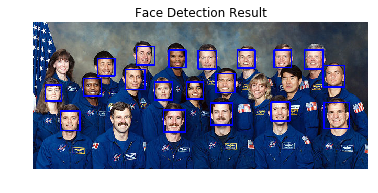

In [26]:
face_classfier_xml = 'my_haarcascade_frontalface_default.xml'
ret = os.path.exists(face_classfier_xml)

if ret:
    print('The cascade classifier xml file already exists')
else:
    print('Downloading the cascade classifier xml file from Inernet ...')
    face_classfier_url = 'https://raw.githubusercontent.com/shantnu/FaceDetect/master/' + 'haarcascade_frontalface_default.xml'
    resp = urlopen(face_classfier_url)
    data = resp.read()
    
    fh = open(face_classfier_xml, 'wb')
    fh.write(data)
    fh.close()
    resp.close()
    
face_cascade = cv2.CascadeClassifier(face_classfier_xml)

faces = face_cascade.detectMultiScale(gray_image, 1.25, 3)
for (x, y, w, h) in faces:
    cv2.rectangle(bgr_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
plt.axis('off')
plt.title('Face Detection Result')
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.show()

# 4.3 - Pedestrian Detection

In [27]:
def url2image(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

In [40]:
url_image = 'https://us.123rf.com/450wm/astroid/astroid1212/astroid121200027/16991143-woman-with-a-child-going-on-a-pedestrian-crossing-in-the-city.jpg?ver=6'
bgr_image = url2image(url_image)

In [41]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

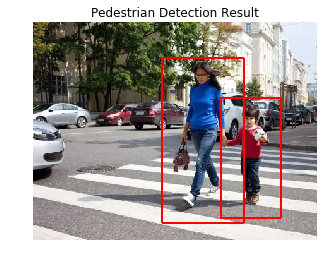

In [42]:
(rects, weights) = hog.detectMultiScale(bgr_image, winStride=(4, 4), padding=(8, 8), scale=1.05)
for(x, y, w , h) in rects:
    cv2.rectangle(bgr_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
plt.axis('off')
plt.title('Pedestrian Detection Result')
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.show()